In [62]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile,f_classif
from sklearn.model_selection import train_test_split
import numpy as np

In [19]:
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data,noise])

In [20]:
cancer.data.shape

(569, 30)

In [21]:
X_w_noise.shape

(569, 80)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=0.5)

In [23]:
print(X_train.shape,X_test.shape)

(284, 80) (285, 80)


In [24]:
select = SelectPercentile(score_func=f_classif,percentile=37.5)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
print(X_train.shape, X_train_selected.shape)

(284, 80) (284, 30)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True False  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
  True  True False  True False False False False]


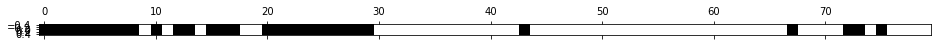

In [26]:
mask = select.get_support()
print(mask)
import matplotlib.pyplot as plt
plt.matshow(mask.reshape(1,-1),cmap='gray_r')

In [44]:
from sklearn.svm import LinearSVC
lr = LinearSVC()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9368421052631579

In [28]:
from sklearn.svm import LinearSVC
lr = LinearSVC()
lr.fit(X_train_selected, y_train)
lr.score(X_test_selected,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9017543859649123

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.9508771929824561

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_selected, y_train)
lr.score(X_test_selected,y_test)

0.9473684210526315

In [39]:
import mglearn
citibike = mglearn.datasets.load_citibike()

In [40]:
citibike[:3]

starttime
2015-08-01 00:00:00    3
2015-08-01 03:00:00    0
2015-08-01 06:00:00    9
Freq: 3H, Name: one, dtype: int64

In [63]:
# 한글 깨짐 방지(폰트설정)
import matplotlib
matplotlib.rc('font',family="HYPost-Light")

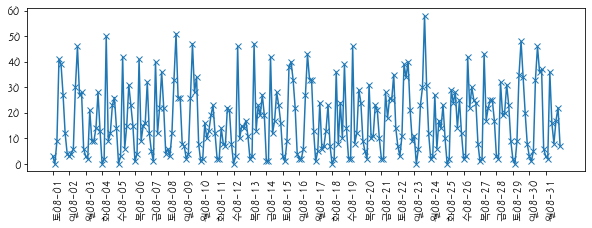

In [65]:
import pandas as pd
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w,d in zip(xticks.strftime("%w"),xticks.strftime("%m-%d"))] # strftime에서 %w항목을 가져오고 %m-%d(month와 day)가져오기
plt.xticks(xticks,xticks_name,rotation=90,ha='left')
plt.plot(citibike,marker='x')
plt.show()

In [66]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1,1)
X

array([[1438387200000000000],
       [1438398000000000000],
       [1438408800000000000],
       [1438419600000000000],
       [1438430400000000000],
       [1438441200000000000],
       [1438452000000000000],
       [1438462800000000000],
       [1438473600000000000],
       [1438484400000000000],
       [1438495200000000000],
       [1438506000000000000],
       [1438516800000000000],
       [1438527600000000000],
       [1438538400000000000],
       [1438549200000000000],
       [1438560000000000000],
       [1438570800000000000],
       [1438581600000000000],
       [1438592400000000000],
       [1438603200000000000],
       [1438614000000000000],
       [1438624800000000000],
       [1438635600000000000],
       [1438646400000000000],
       [1438657200000000000],
       [1438668000000000000],
       [1438678800000000000],
       [1438689600000000000],
       [1438700400000000000],
       [1438711200000000000],
       [1438722000000000000],
       [1438732800000000000],
       [14

In [67]:
n_train = 184
def eval_on_features(features,target,regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train],target[n_train:]
    regressor.fit(X_train, y_train)
    print("score:{:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test) #regressor에게 X_test를 가지고 predict해보라고 함(예상해봐~)
    y_pred_train = regressor.predict(X_train) # 내삽과 외삽
    
    plt.figure(figsize=(10,3)) # 그림그리기
    plt.xticks(range(0,len(X),8), xticks_name, rotation=90, ha='left') # 8 : 하루의 데이터는 8개씩이니까
    
    plt.plot(range(0, n_train),y_train,label="train") # 원본을 먼저 찍음 / range(0, n_train) : 0부터 n_train까지
    plt.plot(range(n_train, n_train+len(y_test)),y_test,label="test") # range(n_train, n_train+len(y_test)) : n_train부터 끝까지
    
    plt.plot(range(0, n_train),y_pred_train,'--',label="pred_train") 
    plt.plot(range(n_train, n_train+len(y_test)),y_pred,'--',label="pred_test")
    
    plt.legend(loc=(1.01,0))
    plt.show()

score:-0.04


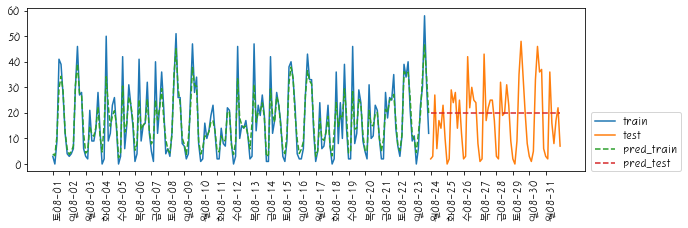

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,random_state=0)
eval_on_features(X,y,reg)

score:0.60


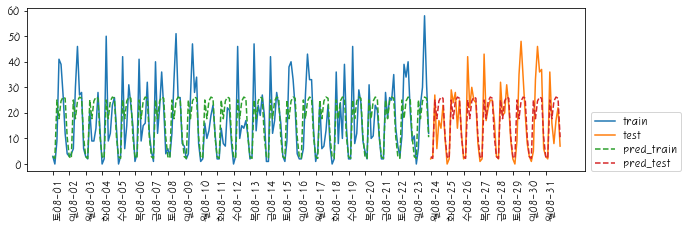

In [71]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,reg) #3시, 6시, 9시만 봐서 요일반영이 되지 않아 다 똑같게 나옴

score:0.84


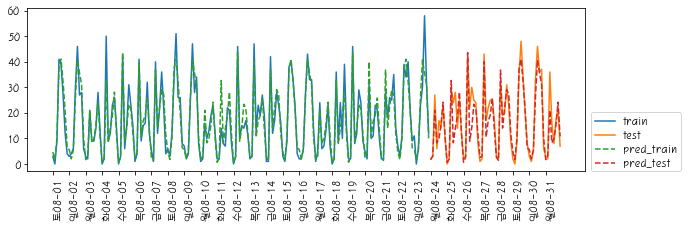

In [73]:
X_dayofweek = citibike.index.dayofweek.values.reshape(-1,1)
X_hour = citibike.index.hour.values.reshape(-1,1)
X_hour_week = np.hstack([X_dayofweek,X_hour])
eval_on_features(X_hour_week,y,reg)

score:0.13


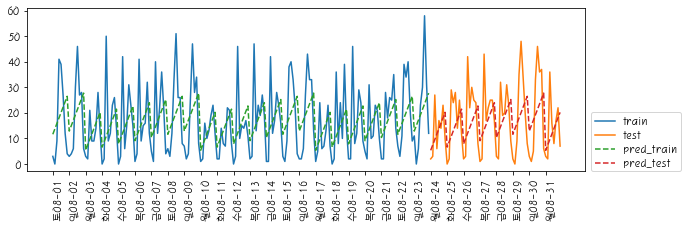

In [75]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

score:0.62


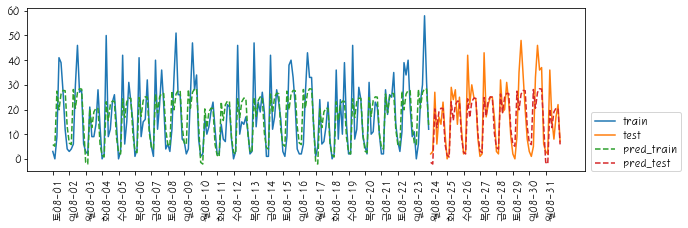

In [101]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

score:0.85


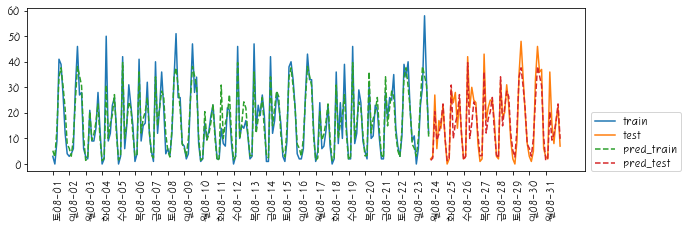

In [102]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly,y,lr)

In [111]:
hour = ["%02d:00"%i for i in range(0,24,3)]
day = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
features = day + hour

In [112]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_!=0]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


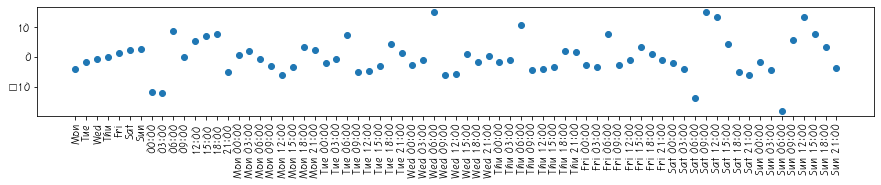

In [116]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.show()

In [114]:
len(coef_nonzero)

71